# Setup

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from pathlib import Path
import pandas as pd

from loguru import logger
import sys
logger.remove()
logger.add(sys.stdout, format="{message}", level="INFO")
#logger.add(sys.stderr, format="<green>{time}</green> <level>{message}</level>", level="DEBUG")

from galaxy_classification.utils import move_columns_to_front

In [9]:
ROOT_DIR = Path().resolve().parent
DATA_DIR = ROOT_DIR / 'data'
SMOG_DATA_DIR = DATA_DIR / 'external' / 'dataset-SMOG'
RGB_DATA_DIR = DATA_DIR / 'raw' / 'galaxies-rgb'

# Scan and parse dataset-SMOG from circulo de astrofisica

In [36]:
from galaxy_classification.dataset import create_smog_catalog

create_smog_catalog(SMOG_DATA_DIR, SMOG_DATA_DIR / 'smog_catalog.csv')

# Scanning SMOG data to generate catalog...
Scanning SMOG field folders in /home/rmegret/galaxy/galaxy-classification/data/external/dataset-SMOG...
  Found 26 unique top-level directories
  15 galaxy, 11 no-galaxy
Scanning SMOG imagetype subfolders...
  Found 131 subfolders
  76 galaxy, 55 no-galaxy
Scanning SMOG image files and extracting their metadata...


  Found 7125 images
  3960 galaxy, 3165 no-galaxy
Sanity check: 0 NA values
SMOG catalog saved to /home/rmegret/galaxy/galaxy-classification/data/external/dataset-SMOG/smog_catalog.csv


,file_loc,galaxy,id_str,imagetype,field,ra,dec,file,folder,subfolder,type,suffix
0,Galaxias/10450_0145/Blue_10450_0145/104.834772...,1,"10450_0145 104.8347729,2.0068920",Blue,10450_0145,104.8347729,2.0068920,"104.8347729,2.0068920_10450_0145_Azul-3.5micra...",Galaxias/10450_0145,Blue_10450_0145,Azul-3.5micras,jpeg
1,Galaxias/10450_0145/Blue_10450_0145/104.103225...,1,"10450_0145 104.1032257,1.8147153",Blue,10450_0145,104.1032257,1.8147153,"104.1032257,1.8147153_10450_0145_Azul-3.5micra...",Galaxias/10450_0145,Blue_10450_0145,Azul-3.5micras,jpeg
2,Galaxias/10450_0145/Blue_10450_0145/104.821454...,1,"10450_0145 104.8214547,0.9927273",Blue,10450_0145,104.8214547,0.9927273,"104.8214547,0.9927273_10450_0145_Azul-3.5micra...",Galaxias/10450_0145,Blue_10450_0145,Azul-3.5micras,jpeg
3,Galaxias/10450_0145/Blue_10450_0145/103.985365...,1,"10450_0145 103.9853656,1.3372564",Blue,10450_0145,103.9853656,1.3372564,"103.9853656,1.3372564_10450_0145_Azul-3.5micra...",Galaxias/10450_0145,Blue_10450_0145,Azul-3.5micras,jpeg
4,Galaxias/10450_0145/Blue_10450_0145/104.624440...,1,"10450_0145 104.6244403,1.6596911",Blue,10450_0145,104.6244403,1.6596911,"104.6244403,1.6596911_10450_0145_Azul-3.5micra...",Galaxias/10450_0145,Blue_10450_0145,Azul-3.5micras,jpeg
...,...,...,...,...,...,...,...,...,...,...,...,...
7120,No_Galaxias/10450_0270/RGB_10450_0270/104.6175...,0,"10450_0270 104.6175231,2.4517444",RGB,10450_0270,104.6175231,2.4517444,"104.6175231,2.4517444_10450_0270_RGB-composite...",No_Galaxias/10450_0270,RGB_10450_0270,RGB-composite,jpeg
7121,No_Galaxias/10450_0270/RGB_10450_0270/104.8877...,0,"10450_0270 104.8877737,2.9923550",RGB,10450_0270,104.8877737,2.9923550,"104.8877737,2.9923550_10450_0270_RGB-composite...",No_Galaxias/10450_0270,RGB_10450_0270,RGB-composite,jpeg
7122,No_Galaxias/10450_0270/RGB_10450_0270/104.5104...,0,"10450_0270 104.5104268,2.5284167",RGB,10450_0270,104.5104268,2.5284167,"104.5104268,2.5284167_10450_0270_RGB-composite...",No_Galaxias/10450_0270,RGB_10450_0270,RGB-composite,jpeg
7123,No_Galaxias/10450_0270/RGB_10450_0270/104.9372...,0,"10450_0270 104.9372738,2.9354354",RGB,10450_0270,104.9372738,2.9354354,"104.9372738,2.9354354_10450_0270_RGB-composite...",No_Galaxias/10450_0270,RGB_10450_0270,RGB-composite,jpeg


# Prepare RGB subset for ML training

### Extract RGB and create files for RGB dataset

In [43]:
smog_catalog = pd.read_csv(SMOG_DATA_DIR / 'smog_catalog.csv')
smog_catalog

,file_loc,galaxy,id_str,imagetype,field,ra,dec,file,folder,subfolder,type,suffix
0,Galaxias/10450_0145/Blue_10450_0145/104.834772...,1,"10450_0145 104.8347729,2.0068920",Blue,10450_0145,104.834773,2.006892,"104.8347729,2.0068920_10450_0145_Azul-3.5micra...",Galaxias/10450_0145,Blue_10450_0145,Azul-3.5micras,jpeg
1,Galaxias/10450_0145/Blue_10450_0145/104.103225...,1,"10450_0145 104.1032257,1.8147153",Blue,10450_0145,104.103226,1.814715,"104.1032257,1.8147153_10450_0145_Azul-3.5micra...",Galaxias/10450_0145,Blue_10450_0145,Azul-3.5micras,jpeg
2,Galaxias/10450_0145/Blue_10450_0145/104.821454...,1,"10450_0145 104.8214547,0.9927273",Blue,10450_0145,104.821455,0.992727,"104.8214547,0.9927273_10450_0145_Azul-3.5micra...",Galaxias/10450_0145,Blue_10450_0145,Azul-3.5micras,jpeg
3,Galaxias/10450_0145/Blue_10450_0145/103.985365...,1,"10450_0145 103.9853656,1.3372564",Blue,10450_0145,103.985366,1.337256,"103.9853656,1.3372564_10450_0145_Azul-3.5micra...",Galaxias/10450_0145,Blue_10450_0145,Azul-3.5micras,jpeg
4,Galaxias/10450_0145/Blue_10450_0145/104.624440...,1,"10450_0145 104.6244403,1.6596911",Blue,10450_0145,104.624440,1.659691,"104.6244403,1.6596911_10450_0145_Azul-3.5micra...",Galaxias/10450_0145,Blue_10450_0145,Azul-3.5micras,jpeg
...,...,...,...,...,...,...,...,...,...,...,...,...
7120,No_Galaxias/10450_0270/RGB_10450_0270/104.6175...,0,"10450_0270 104.6175231,2.4517444",RGB,10450_0270,104.617523,2.451744,"104.6175231,2.4517444_10450_0270_RGB-composite...",No_Galaxias/10450_0270,RGB_10450_0270,RGB-composite,jpeg
7121,No_Galaxias/10450_0270/RGB_10450_0270/104.8877...,0,"10450_0270 104.8877737,2.9923550",RGB,10450_0270,104.887774,2.992355,"104.8877737,2.9923550_10450_0270_RGB-composite...",No_Galaxias/10450_0270,RGB_10450_0270,RGB-composite,jpeg
7122,No_Galaxias/10450_0270/RGB_10450_0270/104.5104...,0,"10450_0270 104.5104268,2.5284167",RGB,10450_0270,104.510427,2.528417,"104.5104268,2.5284167_10450_0270_RGB-composite...",No_Galaxias/10450_0270,RGB_10450_0270,RGB-composite,jpeg
7123,No_Galaxias/10450_0270/RGB_10450_0270/104.9372...,0,"10450_0270 104.9372738,2.9354354",RGB,10450_0270,104.937274,2.935435,"104.9372738,2.9354354_10450_0270_RGB-composite...",No_Galaxias/10450_0270,RGB_10450_0270,RGB-composite,jpeg


In [16]:
from galaxy_classification.dataset import create_rgb_catalog

create_rgb_catalog(SMOG_DATA_DIR / 'smog_catalog.csv', SMOG_DATA_DIR / 'rgb_catalog.csv');

Loading SMOG catalog /home/rmegret/galaxy/galaxy-classification/data/external/dataset-SMOG/smog_catalog.csv...
Keeping only RGB images...
Adapting file_loc to new hierarchy...
Saving to /home/rmegret/galaxy/galaxy-classification/data/external/dataset-SMOG/rgb_catalog.csv...


In [14]:
rgb_catalog = pd.read_csv(SMOG_DATA_DIR / 'rgb_catalog.csv')
rgb_catalog.head()

,file_loc,galaxy,id_str,source_id,file,imagetype,field,ra,dec,folder,subfolder,type,suffix,smog_file_loc
0,"galaxy/104.7263830,2.0560720_10450_0145_RGB-co...",1,"10450_0145 104.7263830,2.0560720",0,"104.7263830,2.0560720_10450_0145_RGB-composite...",RGB,10450_0145,104.726383,2.056072,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.7263830...
1,"galaxy/104.1504793,1.3987231_10450_0145_RGB-co...",1,"10450_0145 104.1504793,1.3987231",1,"104.1504793,1.3987231_10450_0145_RGB-composite...",RGB,10450_0145,104.150479,1.398723,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.1504793...
2,"galaxy/104.9237340,1.5302104_10450_0145_RGB-co...",1,"10450_0145 104.9237340,1.5302104",2,"104.9237340,1.5302104_10450_0145_RGB-composite...",RGB,10450_0145,104.923734,1.530210,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.9237340...
3,"galaxy/104.7788009,1.1385662_10450_0145_RGB-co...",1,"10450_0145 104.7788009,1.1385662",3,"104.7788009,1.1385662_10450_0145_RGB-composite...",RGB,10450_0145,104.778801,1.138566,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.7788009...
4,"galaxy/104.3578369,1.5539122_10450_0145_RGB-co...",1,"10450_0145 104.3578369,1.5539122",4,"104.3578369,1.5539122_10450_0145_RGB-composite...",RGB,10450_0145,104.357837,1.553912,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.3578369...


In [ ]:
from galaxy_classification.dataset import create_rgb_dataset_on_disk

# Will create folders in RGB_DATA_DIR
create_rgb_dataset_on_disk(SMOG_DATA_DIR / 'rgb_catalog.csv', RGB_DATA_DIR, SMOG_DATA_DIR)

1425it [00:00, 3968.24it/s]


### Clean up RGB catalog by checking the center

In [18]:
from galaxy_classification.dataset import clean_rgb_catalog

clean_rgb_catalog(RGB_DATA_DIR / 'catalog.csv', RGB_DATA_DIR / 'clean_catalog.csv', RGB_DATA_DIR);

Cleaning the catalog...


  0%|          | 0/1425 [00:00<?, ?it/s]

 20%|█▉        | 283/1425 [00:02<00:10, 110.49it/s]/home/rmegret/galaxy/galaxy-classification/galaxy_classification/cleaning.py:11: RuntimeWarning: divide by zero encountered in divide
  normalized_im = img / np.max(img[128-20:128+20, 128-20:128+20])
/home/rmegret/galaxy/galaxy-classification/galaxy_classification/cleaning.py:11: RuntimeWarning: invalid value encountered in divide
  normalized_im = img / np.max(img[128-20:128+20, 128-20:128+20])
 21%|██▏       | 306/1425 [00:03<00:10, 107.64it/s]WARNING: NoDetectionsWarning: Input data is constant. No local peaks can be found. [photutils.detection.peakfinder]
/home/rmegret/galaxy/galaxy-classification/galaxy_classification/cleaning.py:11: RuntimeWarning: divide by zero encountered in divide
  normalized_im = img / np.max(img[128-20:128+20, 128-20:128+20])
/home/rmegret/galaxy/galaxy-classification/galaxy_classification/cleaning.py:11: RuntimeWarning: invalid value encountered in divide
  normalized_im = img / np.max(img[128-20:128+20, 

In [ ]:
clean_catalog = pd.read_csv(RGB_DATA_DIR / 'clean_catalog.csv')
clean_catalog.head()

,file_loc,galaxy,id_str,source_id,file,imagetype,field,ra,dec,folder,subfolder,type,suffix,smog_file_loc,center_x,center_y
0,"galaxy/104.7263830,2.0560720_10450_0145_RGB-co...",1,"10450_0145 104.7263830,2.0560720",0,"104.7263830,2.0560720_10450_0145_RGB-composite...",RGB,10450_0145,104.726383,2.056072,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.7263830...,136.0,128.0
1,"galaxy/104.1504793,1.3987231_10450_0145_RGB-co...",1,"10450_0145 104.1504793,1.3987231",1,"104.1504793,1.3987231_10450_0145_RGB-composite...",RGB,10450_0145,104.150479,1.398723,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.1504793...,128.0,136.0
2,"galaxy/104.9237340,1.5302104_10450_0145_RGB-co...",1,"10450_0145 104.9237340,1.5302104",2,"104.9237340,1.5302104_10450_0145_RGB-composite...",RGB,10450_0145,104.923734,1.530210,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.9237340...,129.0,130.0
3,"galaxy/104.7788009,1.1385662_10450_0145_RGB-co...",1,"10450_0145 104.7788009,1.1385662",3,"104.7788009,1.1385662_10450_0145_RGB-composite...",RGB,10450_0145,104.778801,1.138566,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.7788009...,124.0,118.0
4,"galaxy/104.3578369,1.5539122_10450_0145_RGB-co...",1,"10450_0145 104.3578369,1.5539122",4,"104.3578369,1.5539122_10450_0145_RGB-composite...",RGB,10450_0145,104.357837,1.553912,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.3578369...,131.0,129.0


### Generate thumbnails

In [ ]:
from galaxy_classification.dataset import create_rgb_thumbnails_on_disk

create_rgb_thumbnails_on_disk(RGB_DATA_DIR / 'catalog.csv', RGB_DATA_DIR)

catalog_thumb = pd.read_csv(RGB_DATA_DIR / 'catalog_thumb.csv')
catalog_thumb.head()

In [143]:
catalog = catalog_thumb.copy()
catalog_thumb['file_loc']=catalog_thumb['thumb']

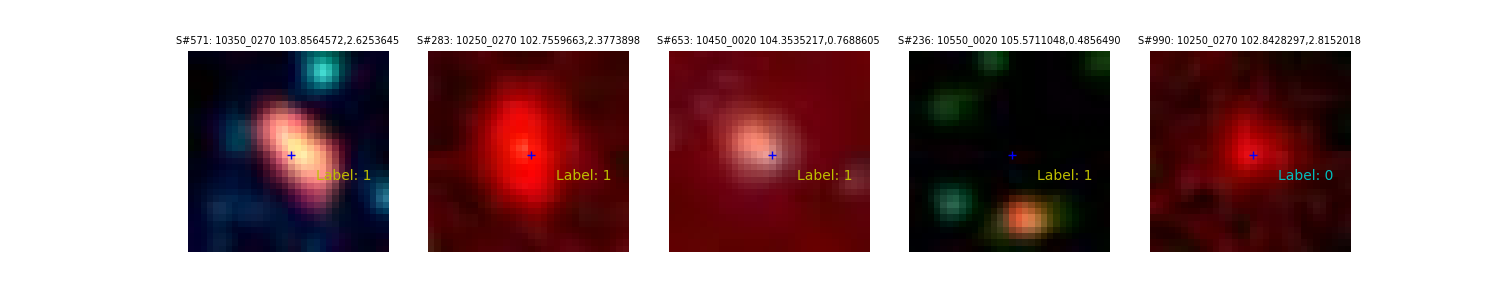

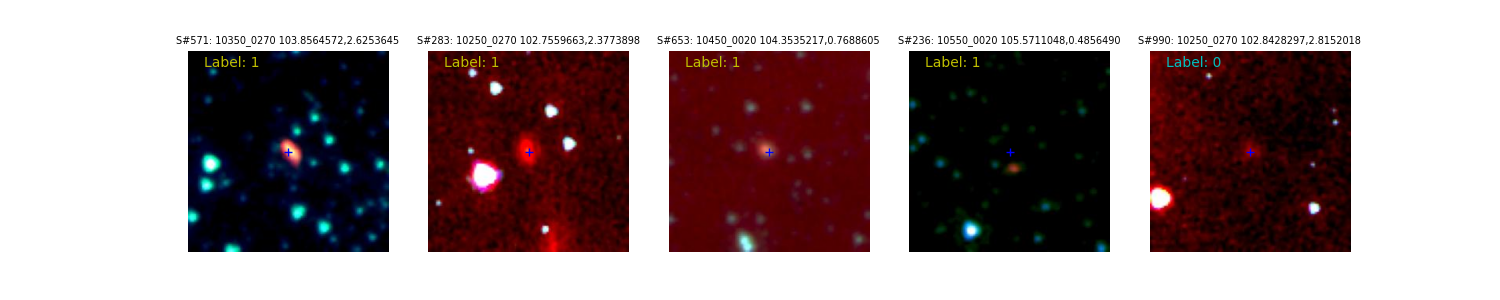

RecursionError: maximum recursion depth exceeded in comparison

RecursionError: maximum recursion depth exceeded in comparison

RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
from galaxy_classification.plots import show_crops
df = catalog_thumb.sample(5, random_state=1)
show_crops(df, nrows=None, plotfun='label', imdir=RGB_DATA_DIR);

df = catalog.sample(5, random_state=1)
show_crops(df, nrows=None, plotfun='label', imdir=RGB_DATA_DIR);

# Visualization GUI

In [1]:
import galaxy_classification.config

In [2]:
from galaxy_classification import gui

In [105]:
clean_catalog = pd.read_csv(RGB_DATA_DIR / 'clean_catalog.csv')

In [106]:
clean_catalog

,file_loc,galaxy,id_str,source_id,file,imagetype,field,ra,dec,folder,subfolder,type,suffix,smog_file_loc,center_x,center_y
0,"galaxy/104.7263830,2.0560720_10450_0145_RGB-co...",1,"10450_0145 104.7263830,2.0560720",0,"104.7263830,2.0560720_10450_0145_RGB-composite...",RGB,10450_0145,104.726383,2.056072,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.7263830...,136.0,128.0
1,"galaxy/104.1504793,1.3987231_10450_0145_RGB-co...",1,"10450_0145 104.1504793,1.3987231",1,"104.1504793,1.3987231_10450_0145_RGB-composite...",RGB,10450_0145,104.150479,1.398723,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.1504793...,128.0,136.0
2,"galaxy/104.9237340,1.5302104_10450_0145_RGB-co...",1,"10450_0145 104.9237340,1.5302104",2,"104.9237340,1.5302104_10450_0145_RGB-composite...",RGB,10450_0145,104.923734,1.530210,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.9237340...,129.0,130.0
3,"galaxy/104.7788009,1.1385662_10450_0145_RGB-co...",1,"10450_0145 104.7788009,1.1385662",3,"104.7788009,1.1385662_10450_0145_RGB-composite...",RGB,10450_0145,104.778801,1.138566,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.7788009...,124.0,118.0
4,"galaxy/104.3578369,1.5539122_10450_0145_RGB-co...",1,"10450_0145 104.3578369,1.5539122",4,"104.3578369,1.5539122_10450_0145_RGB-composite...",RGB,10450_0145,104.357837,1.553912,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.3578369...,131.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,"no_galaxy/104.5032528,2.3985834_10450_0270_RGB...",0,"10450_0270 104.5032528,2.3985834",1419,"104.5032528,2.3985834_10450_0270_RGB-composite...",RGB,10450_0270,104.503253,2.398583,No_Galaxias/10450_0270,RGB_10450_0270,RGB-composite,jpeg,No_Galaxias/10450_0270/RGB_10450_0270/104.5032...,126.0,130.0
1382,"no_galaxy/104.6175231,2.4517444_10450_0270_RGB...",0,"10450_0270 104.6175231,2.4517444",1420,"104.6175231,2.4517444_10450_0270_RGB-composite...",RGB,10450_0270,104.617523,2.451744,No_Galaxias/10450_0270,RGB_10450_0270,RGB-composite,jpeg,No_Galaxias/10450_0270/RGB_10450_0270/104.6175...,127.0,128.0
1383,"no_galaxy/104.8877737,2.9923550_10450_0270_RGB...",0,"10450_0270 104.8877737,2.9923550",1421,"104.8877737,2.9923550_10450_0270_RGB-composite...",RGB,10450_0270,104.887774,2.992355,No_Galaxias/10450_0270,RGB_10450_0270,RGB-composite,jpeg,No_Galaxias/10450_0270/RGB_10450_0270/104.8877...,130.0,128.0
1384,"no_galaxy/104.5104268,2.5284167_10450_0270_RGB...",0,"10450_0270 104.5104268,2.5284167",1422,"104.5104268,2.5284167_10450_0270_RGB-composite...",RGB,10450_0270,104.510427,2.528417,No_Galaxias/10450_0270,RGB_10450_0270,RGB-composite,jpeg,No_Galaxias/10450_0270/RGB_10450_0270/104.5104...,126.0,126.0


In [102]:
clean_catalog = pd.read_csv(RGB_DATA_DIR / 'clean_catalog_manualfix.csv')
clean_catalog.head()

,file_loc,galaxy,id_str,source_id,file,imagetype,field,ra,dec,folder,subfolder,type,suffix,smog_file_loc,center_x,center_y,manual_center
0,"galaxy/101.2065033,3.0625480_10150_0270_RGB-co...",1,"10150_0270 101.2065033,3.0625480",669,"101.2065033,3.0625480_10150_0270_RGB-composite...",RGB,10150_0270,101.206503,3.062548,Galaxias/10150_0270,RGB_10150_0270,RGB-composite,jpeg,Galaxias/10150_0270/RGB_10150_0270/101.2065033...,129.0,126.0,NaN
1,"no_galaxy/104.3719707,0.2998884_10450_0020_RGB...",0,"10450_0020 104.3719707,0.2998884",1253,"104.3719707,0.2998884_10450_0020_RGB-composite...",RGB,10450_0020,104.371971,0.299888,No_Galaxias/10450_0020,RGB_10450_0020,RGB-composite,jpeg,No_Galaxias/10450_0020/RGB_10450_0020/104.3719...,123.0,130.0,NaN
2,"galaxy/103.0162295,2.8721406_10250_0270_RGB-co...",1,"10250_0270 103.0162295,2.8721406",317,"103.0162295,2.8721406_10250_0270_RGB-composite...",RGB,10250_0270,103.016229,2.872141,Galaxias/10250_0270,RGB_10250_0270,RGB-composite,jpeg,Galaxias/10250_0270/RGB_10250_0270/103.0162295...,129.0,126.0,NaN
3,"no_galaxy/101.2583789,2.8106119_10150_0270_RGB...",0,"10150_0270 101.2583789,2.8106119",1320,"101.2583789,2.8106119_10150_0270_RGB-composite...",RGB,10150_0270,101.258379,2.810612,No_Galaxias/10150_0270,RGB_10150_0270,RGB-composite,jpeg,No_Galaxias/10150_0270/RGB_10150_0270/101.2583...,129.0,120.0,True
4,"no_galaxy/102.5672900,2.0709158_10250_0145_RGB...",0,"10250_0145 102.5672900,2.0709158",1076,"102.5672900,2.0709158_10250_0145_RGB-composite...",RGB,10250_0145,102.567290,2.070916,No_Galaxias/10250_0145,RGB_10250_0145,RGB-composite,jpeg,No_Galaxias/10250_0145/RGB_10250_0145/102.5672...,128.0,133.0,NaN


In [119]:
%matplotlib widget
from galaxy_classification import gui
G = gui.GalaxySelectorPlotly(clean_catalog, RGB_DATA_DIR)

Output()

Output()

selected_center [np.float64(136.0), np.float64(128.0)] for idx=0, loc=0


In [121]:
G.catalog[~G.catalog.manual_center.isna()]

,file_loc,galaxy,id_str,source_id,file,imagetype,field,ra,dec,folder,subfolder,type,suffix,smog_file_loc,center_x,center_y,manual_center
4,"galaxy/104.3578369,1.5539122_10450_0145_RGB-co...",1,"10450_0145 104.3578369,1.5539122",4,"104.3578369,1.5539122_10450_0145_RGB-composite...",RGB,10450_0145,104.357837,1.553912,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.3578369...,130.0,128.0,True
9,"galaxy/104.8807827,0.9197180_10450_0145_RGB-co...",1,"10450_0145 104.8807827,0.9197180",9,"104.8807827,0.9197180_10450_0145_RGB-composite...",RGB,10450_0145,104.880783,0.919718,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.8807827...,126.0,126.0,True


In [122]:
G.catalog.to_csv(RGB_DATA_DIR / 'clean_catalog_manualfix.csv', index=False)

In [128]:
G.catalog.center_x.isna().sum()

np.int64(0)

# MISC

In [ ]:
import plotly.graph_objects as go
from ipywidgets import Output
import numpy as np
from PIL import Image

# Create a Plotly FigureWidget
im = np.array(Image.open(RGB_DATA_DIR / clean_catalog.loc[0,'file_loc']))
t = go.Image(z=im)
fig = go.FigureWidget()
tt = fig.add_trace(t)
data = fig.data[0]
data = [d for d in fig.data if isinstance(d,go.Image)][0]

# Output widget to display click events
output = Output()

# Define a click event handler
def handle_click(trace, points, state):
    with output:
        data.z = np.random.random((256,256,3))*255
        print(f"Clicked point: {points.point_inds[0]}")
        
# Attach the click event handler
#data.on_click(handle_click)

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        scaleanchor="y",  # Lock aspect ratio
        scaleratio=1,     # Maintain aspect ratio
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        scaleanchor="x",  # Lock aspect ratio
        scaleratio=1,     # Maintain aspect ratio
    )
)
fig.update_layout(dragmode="zoom")

fig.update_traces(hoverinfo='skip', hovertemplate=None)

fig.show(config={"scrollZoom": True})

# Display the figure and output
display(fig, output)

In [58]:
im.shape

(256, 256, 3)

### Visualize dataset

In [ ]:
catalog['field'].astype('category').cat.categories

Index(['10050_0270', '10150_0145', '10150_0270', '10250_0020', '10250_0145',
       '10250_0270', '10350_0020', '10350_0145', '10350_0270', '10450_0020',
       '10450_0145', '10450_0270', '10550_0020', '10550_0145', '10550_0270'],
      dtype='object')

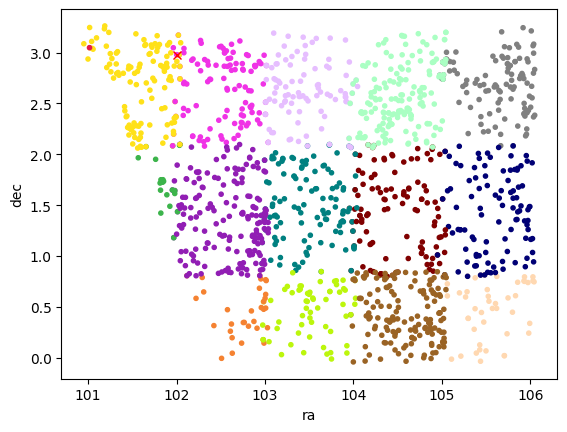

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap([
  '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6',
  '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3',
  '#808000', '#ffd8b1', '#000075', '#808080'
])

plt.scatter(catalog.ra, catalog.dec, c=catalog['field'].astype('category').cat.codes, marker='.', cmap=cmap)
plt.xlabel('ra')
plt.ylabel('dec')
plt.plot(catalog.ra.loc[1000], catalog.dec.loc[1000], 'rx')

In [36]:
catalog.loc[1000].id_str

'102.0014155,2.9788147_10250_0270'

# Prepare splits of RGB dataset

In [123]:
from sklearn.model_selection import train_test_split

In [125]:
catalog = pd.read_csv(RGB_DATA_DIR / 'clean_catalog_manualfix.csv')
catalog.head()

,file_loc,galaxy,id_str,source_id,file,imagetype,field,ra,dec,folder,subfolder,type,suffix,smog_file_loc,center_x,center_y,manual_center
0,"galaxy/104.7263830,2.0560720_10450_0145_RGB-co...",1,"10450_0145 104.7263830,2.0560720",0,"104.7263830,2.0560720_10450_0145_RGB-composite...",RGB,10450_0145,104.726383,2.056072,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.7263830...,136.0,128.0,NaN
1,"galaxy/104.1504793,1.3987231_10450_0145_RGB-co...",1,"10450_0145 104.1504793,1.3987231",1,"104.1504793,1.3987231_10450_0145_RGB-composite...",RGB,10450_0145,104.150479,1.398723,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.1504793...,128.0,136.0,NaN
2,"galaxy/104.9237340,1.5302104_10450_0145_RGB-co...",1,"10450_0145 104.9237340,1.5302104",2,"104.9237340,1.5302104_10450_0145_RGB-composite...",RGB,10450_0145,104.923734,1.530210,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.9237340...,129.0,130.0,NaN
3,"galaxy/104.7788009,1.1385662_10450_0145_RGB-co...",1,"10450_0145 104.7788009,1.1385662",3,"104.7788009,1.1385662_10450_0145_RGB-composite...",RGB,10450_0145,104.778801,1.138566,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.7788009...,124.0,118.0,NaN
4,"galaxy/104.3578369,1.5539122_10450_0145_RGB-co...",1,"10450_0145 104.3578369,1.5539122",4,"104.3578369,1.5539122_10450_0145_RGB-composite...",RGB,10450_0145,104.357837,1.553912,Galaxias/10450_0145,RGB_10450_0145,RGB-composite,jpeg,Galaxias/10450_0145/RGB_10450_0145/104.3578369...,130.0,128.0,True


In [126]:
# Column(s) to use as labels
label_cols = ['galaxy']

train_catalog, test_catalog = train_test_split(catalog, test_size=0.2, random_state=42, stratify=catalog[label_cols])

# Add train columns to tyrack the splits
train_catalog['train']=1
test_catalog['train']=0
catalog['train'] = 0
catalog.loc[train_catalog.index,'train'] = 1

catalog = move_columns_to_front(catalog, ['file_loc', 'galaxy', 'train', 'id_str', 'source_id', 'file'])

print(f"Training set size: {len(train_catalog)}")
print(f"Testing set size: {len(test_catalog)}")

Training set size: 1108
Testing set size: 278


In [127]:
train_catalog.to_csv( RGB_DATA_DIR / 'clean_catalog_manualfix_train.csv', index=False)
test_catalog.to_csv( RGB_DATA_DIR / 'clean_catalog_manualfix_test.csv', index=False)
catalog.to_csv( RGB_DATA_DIR / 'clean_catalog_manualfix_splits.csv', index=False)

In [ ]:
# Pack dataset for easy upload to server
!tar -czvf {DATA_DIR}/galaxies-rgb.tar.gz -C {RGB_DATA_DIR.parent} galaxies-rgb

In [ ]:
# Delete if not used
#!rm {DATA_DIR}/galaxies-rgb.tar.gz

In [ ]:
# List content
!tar -tzvf {DATA_DIR}/galaxies-rgb.tar.gz

In [ ]:
# Unpack
!tar -xzvf {DATA_DIR}/galaxies-rgb.tar.gz -C {DATA_DIR / 'raw'}